In [106]:
import matplotlib.pyplot as plt
import numpy as np

import methods
import lab2.methods as methods2

In [107]:
from scipy.optimize import approx_fprime
import math

np.random.seed(12)


def generate_points(n, f, rg=1):
    X = rg * np.random.rand(n)
    y = []
    X_err = X + 0.2 * np.random.randn(n)
    for x in X_err:
        y.append(f(x))
    return X, np.asarray(y)


def mse(f, w, X, y):
    diff = 0
    for i in range(0, len(X)):
        diff += (f(w)(X[i]) - y[i]) ** 2
    return diff


def mse_func(f, X, y):
    return lambda w: mse(f, w, X, y)


def grad_calculator(x, func, dim):
    h = 1e-5
    res = []
    for i in range(dim):
        delta = np.zeros(dim)
        delta[i] = h
        res.append((func(x + delta) - func(x - delta)) / (2 * h))
    return np.asarray(res)

In [108]:
def grad_func(f, dim):
    return lambda x: grad_calculator(x, f, dim)


def func(p):
    return lambda x: p[0] + p[1] * math.sin(3 * x) / x + p[2] * x


expected = [1, 1, 0.1]


def target_func(x):
    return func(expected)(x)


n = 10
dim = 3
rg = 10
(X, y) = generate_points(n, target_func, rg)
f = mse_func(func, X, y)
grad = grad_func(f, dim)
hess = lambda x0: approx_fprime(x0, lambda t: approx_fprime(t, f))

start = np.zeros(dim)

In [109]:
def make_plot(w1=None, name1=None, w2=None, name2=None, w3=None, name3=None, w4=None, name4=None, w5=None, name5=None,
              w6=None, name6=None,
              w7=None, name7=None, w8=None, name8=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 7, forward=True)
    plt.plot(X, y, 'b.')
    ls = []
    names = []
    t1 = np.arange(0.0, rg + 0.01, 0.1)
    if not w1 is None:
        Y = []
        for x in t1:
            Y.append(func(w1)(x))
        l1, = plt.plot(t1, Y, '-', color='r', linewidth=1, alpha=0.8)
        ls.append(l1)
        names.append(name1)
    if not w2 is None:
        Y = []
        for x in t1:
            Y.append(func(w2)(x))
        l2, = plt.plot(t1, Y, '-', color='y', linewidth=1, alpha=0.8)
        ls.append(l2)
        names.append(name2)
    if not w3 is None:
        Y = []
        for x in t1:
            Y.append(func(w3)(x))
        l3, = plt.plot(t1, Y, '-', color='g', linewidth=1, alpha=0.8)
        ls.append(l3)
        names.append(name3)
    if not w4 is None:
        Y = []
        for x in t1:
            Y.append(func(w4)(x))
        l4, = plt.plot(t1, Y, '-', color='orange', linewidth=1, alpha=0.8)
        ls.append(l4)
        names.append(name4)
    if not w5 is None:
        Y = []
        for x in t1:
            Y.append(func(w5)(x))
        l5, = plt.plot(t1, Y, '-', color='pink', linewidth=1, alpha=0.8)
        ls.append(l5)
        names.append(name5)
    if not w6 is None:
        Y = []
        for x in t1:
            Y.append(func(w6)(x))
        l6, = plt.plot(t1, Y, '-', color='cyan', linewidth=1, alpha=0.8)
        ls.append(l6)
        names.append(name6)
    if not w7 is None:
        Y = []
        for x in t1:
            Y.append(func(w7)(x))
        l7, = plt.plot(t1, Y, '-', color='black', linewidth=1, alpha=0.8)
        ls.append(l7)
        names.append(name7)
    if not w8 is None:
        Y = []
        for x in t1:
            Y.append(func(w8)(x))
        l8, = plt.plot(t1, Y, '-', color='magenta', linewidth=1, alpha=0.8)
        ls.append(l8)
        names.append(name8)
    plt.ylim(0, 4)
    ax.legend(ls, names, loc='upper right', shadow=True, prop={'size': 10})
    plt.xlabel('x')
    plt.ylabel('y')

In [110]:
def print_table(infos, names):
    for i, info in enumerate(infos):
        print("\hline")
        print("{} & {} & {} & {} & {} & 0 \\\\".format(names[i], np.linalg.norm(expected -  info[0][-1]), info[1], info[2], info[3]))


def gauss_f(p):
    return [func(p)(x_i) for x_i in X]


def jacobian(p):
    n = len(X)
    m = len(p)
    h = 0.001
    J = np.zeros((n, m))

    for i in range(n):
        for j in range(m):
            p_minus = p.copy()
            p_plus = p.copy()
            p_minus[j] -= h
            p_plus[j] += h
            J[i, j] = (func(p_plus)(X[i]) - func(p_minus)(X[i])) / (2 * h)
    return J

\hline
BFGS & 0.20093225139014867 & 32 & 31 & 0.0049991607666015625 & 0 \\
\hline
L-BFGS & 0.20092185671927398 & 39 & 31 & 0.004512786865234375 & 0 \\
\hline
Gauss-Newton & 0.20093221184958363 & 2 & 2 & 0.0010001659393310547 & 0 \\
\hline
Powell Dog Leg & 0.20093219639650378 & 20 & 20 & 0.008998870849609375 & 0 \\
\hline
Nesterov & 262273403962.27237 & 13 & 0 & 0.0020012855529785156 & 0 \\
\hline
Momentum & 349800133547.1552 & 19 & 0 & 0.0009989738464355469 & 0 \\
\hline
AdaGrad & 0.2008581939474 & 6984 & 0 & 0.6864473819732666 & 0 \\
\hline
RMSProp & 0.20714526173785752 & 10001 & 0 & 0.9544844627380371 & 0 \\
\hline
Adam & 0.20093218879097918 & 342 & 0 & 0.0359952449798584 & 0 \\


C:\Users\awishy\AppData\Local\Temp\ipykernel_7688\2202940106.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return lambda x: p[0] + p[1] * math.sin(3 * x) / x + p[2] * x


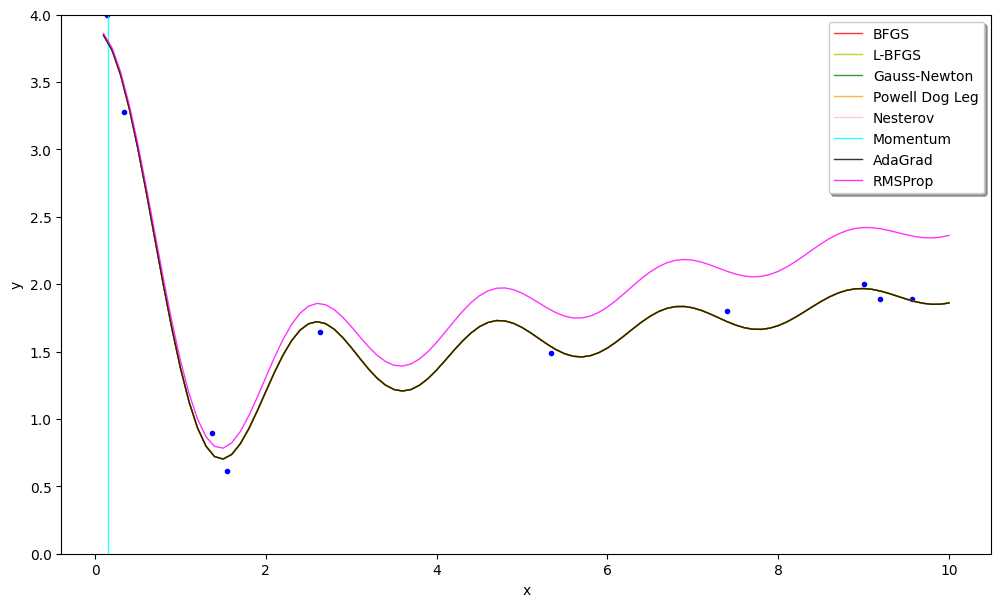

In [111]:
infos = []
lr = lambda x: 0.1

infos.append(methods.bfgs(f, grad, start.copy()))
w1 = infos[-1][0][-1]

infos.append(methods.l_bfgs(f, grad, start.copy()))
w2 = infos[-1][0][-1]

infos.append(methods.gauss_newton(gauss_f, jacobian, X, y, start.copy()))
w3 = infos[-1][0][-1]

infos.append(methods.trust_region_dogleg(f, grad, hess, start))
w4 = infos[-1][0][-1]

infos.append(methods2.sgd_nesterov(f, grad, start.copy(), learning_rate=lr))
w5 = infos[-1][0][-1]

infos.append(methods2.sgd_with_momentum(f, grad, start.copy(), learning_rate=lr))
w6 = infos[-1][0][-1]

infos.append(methods2.sgd_adagrad(f, grad, start.copy(), learning_rate=lr))
w7 = infos[-1][0][-1]

infos.append(methods2.sgd_rmsprop(f, grad, start.copy(), learning_rate=lr))
w8 = infos[-1][0][-1]

infos.append(methods2.sgd_adam(f, grad, start.copy(), learning_rate=lr))
w9 = infos[-1][0][-1]

names = ["BFGS", "L-BFGS", "Gauss-Newton", "Powell Dog Leg", "Nesterov", "Momentum", "AdaGrad", "RMSProp", "Adam"]
print_table(infos, names)
make_plot(w1, names[0], w2, names[1], w3, names[2], w4, names[3], w5, names[4], w6, names[5], w7, names[6], w8,
          names[7])